## クックパッドから画像の取得

以下のパッケージをインストールしておきましょう。
```
$ pip install requests
$ pip install beautifulsoup4
$ pip install Pillow
```

In [6]:
import requests
from bs4 import BeautifulSoup
import re

In [59]:
response = requests.get('http://cookpad.com/search/うどん?page=2') # page番号を変えてループを回せば、たくさん画像を取得できる

In [60]:
soup = BeautifulSoup(response.text, 'lxml')

In [61]:
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<!--
                           MWWWWW
                      WWWWW......MWWWW
                    WWW..............WWW
                  WWW..................WWW
                 WW........WWWWWW........WW
                WW...WWWWWW,    .WRWWWWW..WW
               WW...WW    :      WW     WY.WW
               WW..WW                   YW.WW
               W...YW                   WW..WW
               W....WWB            ,W  WW...WW
               W......RW           WWWW.....WW
               WX.....WW           WW......IW
               WW.....WWtWWWWWWWWWWWt......WW
                WW....W            W......WW
                 WW...WiiiiiiiiiiiIW.....WW
                  WW..=============.....WW
                   WWW................WWW
                     WWWW..........WWWW
                         WWWWWWWWWW

                               oooo                                   .o8
                               `888          

In [62]:
image_urls = soup.find_all('img', alt=re.compile("写真"))

In [67]:
image_urls

[<img alt="写真" src="https://img.cpcdn.com/recipes/5426185/100x141c/532b7380f823e427efa9eadbe8301cd0.jpg?u=17086889&amp;p=1545715033"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5417059/100x141c/11f546c89315ad2f38d89544e5eb2be8.jpg?u=9347984&amp;p=1545115535"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5425790/100x141c/2280f4a82ebafac940f79974d2b62c94.jpg?u=27803862&amp;p=1545689669"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5422312/100x141c/5f7dada94f49ead2f501912572e000c7.jpg?u=13308875&amp;p=1545472732"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5423240/100x141c/ad372c3a556e116c3d76cbc9e3307858.jpg?u=20931561&amp;p=1545540293"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5415810/100x141c/872b37215174fde24590c18d69e2767b.jpg?u=8694531&amp;p=1545043339"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5420601/100x141c/e9c30c520600c6c2880387c3ef6421c9.jpg?u=5536229&amp;p=1545358427"/>,
 <img alt="写真" src="https://img.cpcdn.com/recipes/5

In [64]:
from PIL import Image
from io import BytesIO

In [65]:
for image_url in image_urls:
    r = requests.get(image_url.get('src'))
    img = Image.open(BytesIO(r.content))
    img.show()

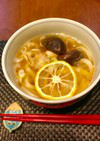

In [66]:
img